In [17]:
# Set up environment...

import warnings
warnings.filterwarnings('ignore')

# Simple Simulation

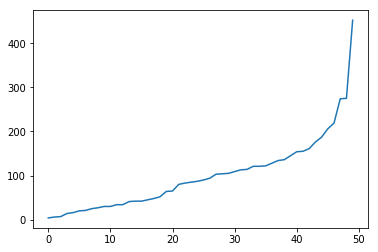

In [18]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
 
def tick(people):
    tickets = np.random.randint(0, people.size, people.size)
    givers = people != 0
    people[givers] -= 1
    np.add.at(people, tickets[np.where(givers)], 1)
    return people
 

# Start off with 50 people and give them each $100
number_people = 50
people = np.ones(number_people, dtype='int') * 100
    
for i in range(50000):
    people = tick(people)

# Plotting code starts here...
plt.plot(sorted(people))
plt.savefig('simulation.svg') 

In [19]:
!open simulation.html 

In [ ]:
x = list(range(0,number_people))
y = sorted(people)
poly_deg = 3
coefs = np.polyfit(x, y, poly_deg)
y_poly = np.polyval(coefs, x)

plt.plot(x, y, "o", label="data points")
plt.plot(x, y_poly, label="polynomial fit", linewidth=1)
plt.ylabel('Money in $')
plt.legend()

In [ ]:
"""
==========================
Scatter plot on polar axis
==========================

Demo of scatter plot on a polar axis.

Size increases radially in this example and color increases with angle
(just to verify the symbols are being scattered correctly).
"""
import numpy as np
import matplotlib.pyplot as plt

# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

plt.show()

In [ ]:
"""
=============================================================
Demo of the histogram (hist) function with multiple data sets
=============================================================

Plot histogram with multiple sample sets and demonstrate:

    * Use of legend with multiple sample sets
    * Stacked bars
    * Step curve with no fill
    * Data sets of different sample sizes

Selecting different bin counts and sizes can significantly affect the
shape of a histogram. The Astropy docs have a great section on how to
select these parameters:
http://docs.astropy.org/en/stable/visualization/histogram.html
"""

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(0)

n_bins = 10
x = np.random.randn(1000, 3)

fig, axes = plt.subplots(nrows=2, ncols=2)
ax0, ax1, ax2, ax3 = axes.flatten()

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, normed=1, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 10})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, normed=1, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

# Make a multiple-histogram of data-sets with different length.
x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

fig.tight_layout()
# plt.show()
plt.plot()
plt.savefig("histogram.pdf")

In [ ]:
!open histogram.pdf

In [ ]:
"""
hexbin is an axes method or pyplot function that is essentially
a pcolor of a 2-D histogram with hexagonal cells.  It can be
much more informative than a scatter plot; in the first subplot
below, try substituting 'scatter' for 'hexbin'.
"""

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100000
x = np.random.standard_normal(n)
y = 2.0 + 3.0 * x + 4.0 * np.random.standard_normal(n)
xmin = x.min()
xmax = x.max()
ymin = y.min()
ymax = y.max()

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(7, 4))
fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
ax = axs[0]
hb = ax.hexbin(x, y, gridsize=50, cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax = axs[1]
hb = ax.hexbin(x, y, gridsize=50, bins='log', cmap='inferno')
ax.axis([xmin, xmax, ymin, ymax])
ax.set_title("With a log color scale")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('log10(N)')

plt.show()

In [ ]:
"""
====
XKCD
====

Shows how to create an xkcd-like plot.
"""
import matplotlib.pyplot as plt
import numpy as np

with plt.xkcd():
    # Based on "Stove Ownership" from XKCD by Randall Monroe
    # http://xkcd.com/418/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30, 10])

    data = np.ones(100)
    data[70:] -= np.arange(30)

    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70, 1), arrowprops=dict(arrowstyle='->'), xytext=(15, -10))

    plt.plot(data)

    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5, 0.05,
        '"Stove Ownership" from xkcd by Randall Monroe',
        ha='center')

    # Based on "The Data So Far" from XKCD by Randall Monroe
    # http://xkcd.com/373/

    fig = plt.figure()
    ax = fig.add_axes((0.1, 0.2, 0.8, 0.7))
    ax.bar([0, 1], [0, 100], 0.25)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks([0, 1])
    ax.set_xlim([-0.5, 1.5])
    ax.set_ylim([0, 110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT', 'REFUTED BY\nEXPERIMENT'])
    plt.yticks([])

    plt.title("CLAIMS OF SUPERNATURAL POWERS")

    fig.text(
        0.5, 0.01,
        '"The Data So Far" from xkcd by Randall Monroe',
        ha='center')

plt.show()


In [ ]:
# Replot simulation using xkcd

import matplotlib.pyplot as plt
import numpy as np

plt.plot(sorted(people))

# Melbourne Water dam levels

In [ ]:
# Set up environment...

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

%matplotlib inline 

# plt.style.use('fivethirtyeight')

df = pd.read_csv('daily_storage.csv', 
                 names=['name', 'tvol', 'cvol', 'change', 'pfull', 'rain'], 
                 header=0, engine='python', skipfooter=1)
ax = df.plot('name', 'pfull', kind='bar', ylim=(60,100))
ax.set_ylabel("Percent Full")

In [ ]:
ax = df.plot('name', 'pfull', kind='bar')
ax.set_ylabel("Percent Full")

## Introduce Seaborn

[Seaborn](http://seaborn.pydata.org/examples/index.html)

In [ ]:
import seaborn as sns
# sns.set()
# sns.set_style("white")
# sns.set(style="whitegrid", palette="muted")

df['gap'] = df['tvol'] - df['cvol']
ax = df.plot('name', ['cvol', 'gap'], kind='bar', stacked=True)
ax.set_ylabel("Volume (ML)")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

In [ ]:
tips = sns.load_dataset("tips")
tips[:10]

In [ ]:
import seaborn as sns

sns.set(style="ticks")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and sex
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn")
sns.despine(offset=10, trim=True)

In [ ]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,
               inner="quart", palette={"Male": "b", "Female": "y"})
sns.despine(left=True)

In [ ]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", size=4,
           scatter_kws={"s": 50, "alpha": 1})

# ACORN-SAT
## Australian Temperature Reference Network¶

In [ ]:
# Show a simple map

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

%matplotlib inline

map = Basemap(projection='ortho', 
              lat_0=0, lon_0=0, resolution='l')

#Fill the globe with a blue color 
map.drawmapboundary(fill_color='aqua')

#Fill the continents with the land color
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

plt.show()

In [ ]:
# Show a simple map of Australia

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
map = Basemap(llcrnrlon=100, llcrnrlat=-45, urcrnrlon=170, urcrnrlat=-5)
# map = Basemap(llcrnrlon=100, llcrnrlat=-45, urcrnrlon=170, urcrnrlat=-5, resolution='l')
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
map.drawcoastlines()

plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('stations.csv')
df[:5]

In [ ]:
# Show a map of Australia with ACORN-SAT stations

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(20,10))
map = Basemap(llcrnrlon=100, llcrnrlat=-45, urcrnrlon=170, urcrnrlat=-5, resolution='l')
map.drawmapboundary(fill_color='#99ffff')
map.fillcontinents(color='coral',lake_color='#99ffff')
map.scatter(df['lon'], df['lat'], 25, marker='o',color='k', zorder=50)

plt.show()

In [ ]:
import numpy as np
import scipy.spatial 
from graphviz import Digraph

latlon = list(zip(df['lat'], df['lon']))

tree = scipy.spatial.cKDTree(latlon)
dd, ii = tree.query(latlon, k=4)
dot = Digraph()

for x in df["stn_num"]:
   dot.node(str(x))
    
for line in ii:
   for x in line[1:]:
        dot.edges([(str(df["stn_num"][line[0]]), str(df["stn_num"][x]))])

dot.render(view=True)

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

lonlat = list(zip(df['lon'], df['lat']))
vor = Voronoi(lonlat)
voronoi_plot_2d(vor)

plt.show()

# See: http://schweitzer.id.au/acorn_sat/voronoi2.html

[Voronoi](http://schweitzer.id.au/acorn_sat/voronoi2.html)

Leaving out Cartopy

# Bokeh

In [ ]:
from __future__ import print_function

import numpy as np
import pandas as pd

from bokeh.util.browser import view
from bokeh.document import Document
from bokeh.embed import file_html
from bokeh.layouts import gridplot
from bokeh.models.glyphs import Circle, Line
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Plot, Range1d
from bokeh.resources import INLINE

raw_columns=[
[10.0,   8.04,   10.0,   9.14,   10.0,   7.46,   8.0,    6.58],
[8.0,    6.95,   8.0,    8.14,   8.0,    6.77,   8.0,    5.76],
[13.0,   7.58,   13.0,   8.74,   13.0,   12.74,  8.0,    7.71],
[9.0,    8.81,   9.0,    8.77,   9.0,    7.11,   8.0,    8.84],
[11.0,   8.33,   11.0,   9.26,   11.0,   7.81,   8.0,    8.47],
[14.0,   9.96,   14.0,   8.10,   14.0,   8.84,   8.0,    7.04],
[6.0,    7.24,   6.0,    6.13,   6.0,    6.08,   8.0,    5.25],
[4.0,    4.26,   4.0,    3.10,   4.0,    5.39,   19.0,   12.5],
[12.0,   10.84,  12.0,   9.13,   12.0,   8.15,   8.0,    5.56],
[7.0,    4.82,   7.0,    7.26,   7.0,    6.42,   8.0,    7.91],
[5.0,    5.68,   5.0,    4.74,   5.0,    5.73,   8.0,    6.89]]

quartet = pd.DataFrame(data=raw_columns, columns=
                       ['Ix','Iy','IIx','IIy','IIIx','IIIy','IVx','IVy'])


circles_source = ColumnDataSource(
    data = dict(
        xi   = quartet['Ix'],
        yi   = quartet['Iy'],
        xii  = quartet['IIx'],
        yii  = quartet['IIy'],
        xiii = quartet['IIIx'],
        yiii = quartet['IIIy'],
        xiv  = quartet['IVx'],
        yiv  = quartet['IVy'],
    )
   )

x = np.linspace(-0.5, 20.5, 10)
y = 3 + 0.5 * x
lines_source = ColumnDataSource(data=dict(x=x, y=y))

xdr = Range1d(start=-0.5, end=20.5)
ydr = Range1d(start=-0.5, end=20.5)

def make_plot(title, xname, yname):
    plot = Plot(x_range=xdr, y_range=ydr, plot_width=400, plot_height=400,
                border_fill_color='white', background_fill_color='#e9e0db')
    plot.title.text = title
    
    xaxis = LinearAxis(axis_line_color=None)
    plot.add_layout(xaxis, 'below')

    yaxis = LinearAxis(axis_line_color=None)
    plot.add_layout(yaxis, 'left')

    plot.add_layout(Grid(dimension=0, ticker=xaxis.ticker))
    plot.add_layout(Grid(dimension=1, ticker=yaxis.ticker))

    line = Line(x='x', y='y', line_color="#666699", line_width=2)
    plot.add_glyph(lines_source, line)

    circle = Circle(
        x=xname, y=yname, size=12,
        fill_color="#cc6633", line_color="#cc6633", fill_alpha=0.5
    )
    plot.add_glyph(circles_source, circle)

    return plot

I   = make_plot('I',   'xi',   'yi')
II  = make_plot('II',  'xii',  'yii')
III = make_plot('III', 'xiii', 'yiii')
IV  = make_plot('IV',  'xiv',  'yiv')

# grid = gridplot([[I, II], [III, IV]], toolbar_location=None)
grid = gridplot([[I, II], [III, IV]], toolbar_location='below')

doc = Document()
doc.add_root(grid)


doc.validate()
filename = "anscombe.html"
with open(filename, "w") as f:
    f.write(file_html(doc, INLINE, "Anscombe's Quartet"))
print("Wrote %s" % filename)
view(filename)

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.sampledata.iris import flowers

%matplotlib inline

output_notebook()

colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in flowers['species']]

p = figure(title = "Iris Morphology")
p.xaxis.axis_label = 'Petal Length'
p.yaxis.axis_label = 'Petal Width'

p.circle(flowers["petal_length"], flowers["petal_width"],
         color=colors, fill_alpha=0.2, size=10)

# output_file("iris.html", title="iris.py example")

show(p)

In [ ]:
# Joyplots

from numpy import linspace
from scipy.stats.kde import gaussian_kde

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FixedTicker, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.sampledata.perceptions import probly

import colorcet as cc

%matplotlib inline

output_file("joyplot.html")

def joy(category, data, scale=20):
    return list(zip([category]*len(data), scale*data))

cats = list(reversed(probly.keys()))

palette = [cc.rainbow[i*15] for i in range(17)]

x = linspace(-20,110, 500)

source = ColumnDataSource(data=dict(x=x))

p = figure(y_range=cats, plot_width=900, x_range=(-5, 105), toolbar_location=None)

for i, cat in enumerate(reversed(cats)):
    pdf = gaussian_kde(probly[cat])
    y = joy(cat, pdf(x))
    source.add(y, cat)
    p.patch('x', cat, color=palette[i], alpha=0.6, line_color="black", source=source)

p.outline_line_color = None
p.background_fill_color = "#efefef"

p.xaxis.ticker = FixedTicker(ticks=list(range(0, 101, 10)))
p.xaxis.formatter = PrintfTickFormatter(format="%d%%")

p.ygrid.grid_line_color = None
p.xgrid.grid_line_color = "#dddddd"
p.xgrid.ticker = p.xaxis[0].ticker

p.axis.minor_tick_line_color = None
p.axis.major_tick_line_color = None
p.axis.axis_line_color = None

p.y_range.range_padding = 0.12

show(p)

# Plotly

In [ ]:
import plotly.plotly as py
import plotly.figure_factory as ff
import pandas as pd

df = pd.read_csv("school_earnings.csv")

table = ff.create_table(df)
py.iplot(table)

In [ ]:
import plotly
from plotly.graph_objs import *
plotly.offline.init_notebook_mode(connected=True)


trace_women = Bar(x=df.School,
                  y=df.Women,
                  name='Women',
                  marker=dict(color='#ffcdd2'))

trace_men = Bar(x=df.School,
                y=df.Men,
                name='Men',
                marker=dict(color='#A2D5F2'))

trace_gap = Bar(x=df.School,
                y=df.Gap,
                name='Gap',
                marker=dict(color='#59606D'))

data = [trace_women, trace_men, trace_gap]
layout = Layout(title="Average Earnings for Graduates",
                xaxis=dict(title='School'),
                yaxis=dict(title='Salary (in thousands)'))
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig)

# Maps

## Google Maps (and Highcharts)

* [ACORN-SAT](http://schweitzer.id.au/acorn_sat/acorn3.html)

* [Regional Water Information](http://www.bom.gov.au/water/rwi/#sf_tt/001/2017)
                             
* [ESCCI](http://reg.bom.gov.au/climate/reg/escci/#lon=152&lat=-32&zoom=1&start_date=2007-06-01&end_date=2007-06-30)

# Cesium

[USGS Earthquake Data](https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php)

In [ ]:
import mpl_toolkits 


In [ ]:
import netCDF4 as nc
import matplotlib.pyplot as plt

%matplotlib inline

dataset = nc.Dataset('rain_19700101.nc')
data = dataset.variables["rain_day"]
plt.pcolormesh(data[0])
plt.colorbar()

In [ ]:
import netCDF4 as nc
import matplotlib.pyplot as plt

year = 1967
month = 2
day = 16

%matplotlib inline
url = 'http://opendap.bom.gov.au:8080/thredds/dodsC/agcd/tmax/mean/r005/01day/{year}/tmax_mean_r005_{year}{month:02d}{day:02d}_{year}{month:02d}{day:02d}.nc'.format(
    year=year, month=month, day=day)
# dataset = nc.Dataset('tmax_20180201.nc')
dataset = nc.Dataset(url)
data = dataset.variables["tmax"]
plt.pcolormesh(data[0], cmap='jet')
plt.colorbar()

In [ ]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy.ma as ma

%matplotlib inline

year = 1967
month = 2
day = 16

mask = nc.Dataset('land_mask.nc')
mask_data = mask.variables['mask'][:,:]
print(mask_data)
url = 'http://opendap.bom.gov.au:8080/thredds/dodsC/agcd/tmax/mean/r005/01day/{year}/tmax_mean_r005_{year}{month:02d}{day:02d}_{year}{month:02d}{day:02d}.nc'.format(
    year=year, month=month, day=day)
# dataset = nc.Dataset('tmax_20180201.nc')
dataset = nc.Dataset(url)
data = dataset.variables["tmax"][0]
#print(data)
# mask_data = mask_data.astype(int)
mask_data = mask_data != 1.0
# data = data[mask_data]
#print(data)
masked_data = ma.masked_array(data, mask=mask_data)
plt.pcolormesh(masked_data, cmap='hot')
plt.colorbar()

In [ ]:
import json
import shapely
import shapely.geometry

# Load the file
file = open('river_regions.json')
shapes = json.load(file)

# Look for the shape of interest
features = shapes["features"]
found = None
for item in features:
    if item["properties"]["rivregname"] == "BARWON RIVER-LAKE CORANGAMITE":
        found = item["geometry"]
        
# If we find the shape, then convert it to a shapely object        
if found:
    shape = shapely.geometry.shape(found)
        
import netCDF4 as nc
from shapely.geometry import Point

import numpy as np
import numpy.ma as ma
# import matplotlib.colors as mpc
import matplotlib.pyplot as plt

def lat2ndx(lat):
    """given a latitude, return the array offset"""
    return 690 - int(round((-lat + 0.000001 - 10.0) / 0.05))

def lon2ndx(lon):
    """given a longitude, return the array offset"""
    return int(round((lon + 0.000001 - 112.0) / 0.05))

bounds = shape.bounds
xmin = lon2ndx(bounds[0])
xmax = lon2ndx(bounds[2])
ymin = lat2ndx(bounds[1])
ymax = lat2ndx(bounds[3])

dataset = nc.Dataset('rain_19700101.nc')

data = dataset.variables["rain_day"]
areal_data = data[0,ymin:ymax, xmin:xmax]
# plt.pcolormesh(areal_data)

# print xmin, xmax, ymin, ymax
mask = np.ones(areal_data.shape, dtype=int)
for i, x in enumerate(np.arange(bounds[0], bounds[2] - 0.05, 0.05)):
    for j, y in enumerate(np.arange(bounds[1], bounds[3] - 0.05, 0.05)):
        if shape.contains(Point(x, y)):
            mask[j, i] = 0
            # print j, i
            

valid_areal_data = ma.masked_array(areal_data, mask)

# palette.set_bad('grey')

plt.pcolormesh(valid_areal_data)
plt.colorbar()

In [ ]:
import networkx as nx

from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.models.graphs import from_networkx

G = nx.karate_club_graph()

plot = figure(title="Networkx Integration Demonstration", x_range=(-1.1,1.1), y_range=(-1.1,1.1),
              tools="", toolbar_location=None)

graph = from_networkx(G, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

output_file("networkx_graph.html")
show(plot)

In [ ]:
!open networkx_graph.html


In [ ]:
import networkx as nx

from bokeh.io import show, output_file
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.palettes import Spectral4

%matplotlib osx

G=nx.karate_club_graph()

plot = Plot(plot_width=400, plot_height=400,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "Graph Interaction Demonstration"

plot.add_tools(HoverTool(tooltips=None), TapTool(), BoxSelectTool())

graph_renderer = from_networkx(G, nx.circular_layout, scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)

output_file("interactive_graphs.html")
show(plot)

In [ ]:
%time
from bokeh.tile_providers import STAMEN_TERRAIN
import datashader as ds
import datashader.transfer_functions as tf
import pandas as pd

plot_width  = int(750)
plot_height = int(plot_width//1.2)

x_range, y_range = (11131949.079327356,15584728.711058298),  (-1118889.9748579608, -8399737.88981836)

def base_plot(tools='pan,wheel_zoom,reset',plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, plot_width=plot_width, plot_height=plot_height,
        x_range=x_range, y_range=y_range, outline_line_color=None,
        min_border=0, min_border_left=0, min_border_right=0,
        min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p



df = pd.read_csv('gpats.dat', names=['date', 'lat', 'lon', 'amp'], header=None)

p = base_plot()
p.add_tile(STAMEN_TERRAIN)

cvs = ds.Canvas(plot_width=1400, plot_height=1400)
agg = cvs.points(df, 'lon', 'lat', ds.mean('amp'))
img = tf.shade(agg, cmap=['lightblue', 'darkblue'])
show(p)


In [ ]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

In [ ]:
import datashader as ds
from datashader.bokeh_ext import InteractiveImage
from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9, Hot, viridis, inferno
from IPython.core.display import HTML, display

background = "black"
export = partial(export_image, export_path="export", background=background)
cm = partial(colormap_select, reverse=(background=="black"))

#def create_image(x_range, y_range, w=plot_width, h=plot_height):
#    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
#    agg = cvs.points(df, 'dropoff_x', 'dropoff_y',  ds.count('passenger_count'))
#    img = tf.shade(agg, cmap=Hot, how='eq_hist')
#    return tf.dynspread(img, threshold=0.5, max_px=4)

p = base_plot(background_fill_color=background)
export(create_image(*NYC),"NYCT_hot")
InteractiveImage(p, create_image)

In [ ]:
from pyproj import Proj, transform
print(transform(Proj(init='epsg:4326'), Proj(init='epsg:3857'), 140, -10))  # longitude first, latitude second.
# output (meters east of 0, meters north of 0): (-14314.651244750548, 6711665.883938471)

# Some experimental stuff...

In [ ]:
"""

From: https://matplotlib.org/examples/statistics/boxplot_vs_violin_demo.html

===================================
Box plot vs. violin plot comparison
===================================

Note that although violin plots are closely related to Tukey's (1977)
box plots, they add useful information such as the distribution of the
sample data (density trace).

By default, box plots show data points outside 1.5 * the inter-quartile
range as outliers above or below the whiskers whereas violin plots show
the whole range of the data.

A good general reference on boxplots and their history can be found
here: http://vita.had.co.nz/papers/boxplots.pdf

Violin plots require matplotlib >= 1.4.

For more information on violin plots, the scikit-learn docs have a great
section: http://scikit-learn.org/stable/modules/density.html
"""

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('violin plot')

# plot box plot
axes[1].boxplot(all_data)
axes[1].set_title('box plot')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))])
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()

In [ ]:
# Bokeh weather data...

from os.path import join, dirname
import datetime

import pandas as pd
from scipy.signal import savgol_filter

from bokeh.io import curdoc
from bokeh.layouts import row, column
from bokeh.models import ColumnDataSource, DataRange1d, Select
from bokeh.palettes import Blues4
from bokeh.plotting import figure



STATISTICS = ['record_min_temp', 'actual_min_temp', 'average_min_temp', 'average_max_temp', 'actual_max_temp', 'record_max_temp']

def get_dataset(src, name, distribution):
    df = src[src.airport == name].copy()
    del df['airport']
    df['date'] = pd.to_datetime(df.date)
    # timedelta here instead of pd.DateOffset to avoid pandas bug < 0.18 (Pandas issue #11925)
    df['left'] = df.date - datetime.timedelta(days=0.5)
    df['right'] = df.date + datetime.timedelta(days=0.5)
    df = df.set_index(['date'])
    df.sort_index(inplace=True)
    if distribution == 'Smoothed':
        window, order = 51, 3
        for key in STATISTICS:
            df[key] = savgol_filter(df[key], window, order)

    return ColumnDataSource(data=df)

def make_plot(source, title):
    plot = figure(x_axis_type="datetime", plot_width=800, tools="", toolbar_location=None)
    plot.title.text = title

    plot.quad(top='record_max_temp', bottom='record_min_temp', left='left', right='right',
              color=Blues4[2], source=source, legend="Record")
    plot.quad(top='average_max_temp', bottom='average_min_temp', left='left', right='right',
              color=Blues4[1], source=source, legend="Average")
    plot.quad(top='actual_max_temp', bottom='actual_min_temp', left='left', right='right',
              color=Blues4[0], alpha=0.5, line_color="black", source=source, legend="Actual")

    # fixed attributes
    plot.xaxis.axis_label = None
    plot.yaxis.axis_label = "Temperature (F)"
    plot.axis.axis_label_text_font_style = "bold"
    plot.x_range = DataRange1d(range_padding=0.0)
    plot.grid.grid_line_alpha = 0.3

    return plot

def update_plot(attrname, old, new):
    city = city_select.value
    plot.title.text = "Weather data for " + cities[city]['title']

    src = get_dataset(df, cities[city]['airport'], distribution_select.value)
    source.data.update(src.data)

city = 'Austin'
distribution = 'Discrete'

cities = {
    'Austin': {
        'airport': 'AUS',
        'title': 'Austin, TX',
    },
    'Boston': {
        'airport': 'BOS',
        'title': 'Boston, MA',
    },
    'Seattle': {
        'airport': 'SEA',
        'title': 'Seattle, WA',
    }
}

city_select = Select(value=city, title='City', options=sorted(cities.keys()))
distribution_select = Select(value=distribution, title='Distribution', options=['Discrete', 'Smoothed'])

df = pd.read_csv(join('2015_weather.csv'))
source = get_dataset(df, cities[city]['airport'], distribution)
plot = make_plot(source, "Weather data for " + cities[city]['title'])

city_select.on_change('value', update_plot)
distribution_select.on_change('value', update_plot)

controls = column(city_select, distribution_select)

curdoc().add_root(row(plot, controls))
curdoc().title = "Weather"

See: [Bokeh Demo](https://demo.bokehplots.com/apps/weather)

In [ ]:
# Read acorn sat data for Melbourne...

import pandas as pd
import datetime

def to_date(d):
    return(datetime.datetime.strptime(d, '%Y-%m-%d'))
           
df = pd.read_csv('acorn_86071.csv', skiprows=0, 
                 names=['stn_num','date', 'tmin', 'tmax', 'prcp'],
                 index_col='date',
                 converters=({'date': to_date}))

df.groupby(df.index.dayofyear).max()



In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(0, 20, 50)

def do_plot(n):
    y = np.sin(x) * n
    plt.plot(x, y)
    plt.show()    

interact(do_plot, n=1);

In [ ]:
def f(x):
    return x

interact(f, x=10);

# Vega

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame({'x': np.random.randn(100), 'y': np.random.randn(100)})
df.plot.scatter(x='x', y='y')

In [ ]:
import numpy as np
import pandas as pd
import pdvega  # import adds vgplot attribute to pandas

df = pd.DataFrame({'x': np.random.randn(100), 'y': np.random.randn(100)})

df.vgplot.scatter(x='x', y='y')

[Vega Gallery](https://vega.github.io/vega-lite/examples/)

In [ ]:
# Bokeh demo of gapminder

# -*- coding: utf-8 -*-
import pandas as pd

from bokeh.core.properties import field
from bokeh.io import curdoc
from bokeh.layouts import layout
from bokeh.models import (
    ColumnDataSource, HoverTool, SingleIntervalTicker, Slider, Button, Label,
    CategoricalColorMapper,
)
from bokeh.palettes import Spectral6
from bokeh.plotting import figure

from data import process_data

fertility_df, life_expectancy_df, population_df_size, regions_df, years, regions_list = process_data()

p = pd.Panel({'fertility': fertility_df, 'life': life_expectancy_df, 'population': population_df_size})

data = {}

region_name = regions_df.Group
region_name.name = 'region'

for year in years:
    df = pd.concat([p.loc[:, :, year], region_name], axis=1).reset_index()
    data[year] = df.to_dict('series')

source = ColumnDataSource(data=data[years[0]])

plot = figure(x_range=(1, 9), y_range=(20, 100), title='Gapminder Data', plot_height=300)
plot.xaxis.ticker = SingleIntervalTicker(interval=1)
plot.xaxis.axis_label = "Children per woman (total fertility)"
plot.yaxis.ticker = SingleIntervalTicker(interval=20)
plot.yaxis.axis_label = "Life expectancy at birth (years)"

label = Label(x=1.1, y=18, text=str(years[0]), text_font_size='70pt', text_color='#eeeeee')
plot.add_layout(label)

color_mapper = CategoricalColorMapper(palette=Spectral6, factors=regions_list)
plot.circle(
    x='fertility',
    y='life',
    size='population',
    source=source,
    fill_color={'field': 'region', 'transform': color_mapper},
    fill_alpha=0.8,
    line_color='#7c7e71',
    line_width=0.5,
    line_alpha=0.5,
    legend=field('region'),
)
plot.add_tools(HoverTool(tooltips="@index", show_arrow=False, point_policy='follow_mouse'))


def animate_update():
    year = slider.value + 1
    if year > years[-1]:
        year = years[0]
    slider.value = year


def slider_update(attrname, old, new):
    year = slider.value
    label.text = str(year)
    source.data = data[year]

slider = Slider(start=years[0], end=years[-1], value=years[0], step=1, title="Year")
slider.on_change('value', slider_update)


def animate():
    if button.label == '► Play':
        button.label = '❚❚ Pause'
        curdoc().add_periodic_callback(animate_update, 200)
    else:
        button.label = '► Play'
        curdoc().remove_periodic_callback(animate_update)

button = Button(label='► Play', width=60)
button.on_click(animate)

layout = layout([
    [plot],
    [slider, button],
], sizing_mode='scale_width')

curdoc().add_root(layout)
curdoc().title = "Gapminder"

# Simulation of Parrondo's paradox

Problem from: https://fronkonstin.com/2014/12/16/the-awesome-parrondos-paradox/

Rules

* Coin 1: Probability of head=0.495 and probability of tail=0.505
* Coin 2: Probability of head=0.745 and probability of tail=0.255
* Coin 3: Probability of head=0.095 and probability of tail=0.905

Strategies

* Game A: You toss coin 1 and if it comes up head you receive 1€ but if not, you lose 1€
* Game B: If your present capital is a multiple of 3, you toss coin 2. If not, you toss coin 3. In both cases, you receive 1€ if coin comes up head and lose 1€ if not.

In [ ]:
import numpy as np

def coin_1(): 
    return np.random.rand() < 0.495
def coin_2():
    return np.random.rand() < 0.745
def coin_3(): 
    return np.random.rand() < 0.095

def game_a(kitty):
    if coin_1():
        return kitty + 1
    else:
        return kitty - 1
    
def game_b(kitty):
    if kitty % 3:
        val = coin_2()
    else:
        val = coin_3()
    if val:
        return kitty + 1
    else:
        return kitty -1
    
def game_a_b(kitty):
    if np.random.rand() > 0.5:
        return game_a(kitty)
    else:
        return game_b(kitty)
    
def play(n, strategy):
    result = []
    kitty = 0
    for i in range(n):
        kitty = strategy(kitty)
        result.append(kitty)
    return result

p = play(10000, game_a)
plt.plot(p, label="game_a")
p = play(10000, game_b)
plt.plot(p, label="game_b")
p = play(10000, game_a_b)
plt.plot(p, label="game_a_b")
plt.legend()


In [ ]:
np.random.rand()

In [ ]:
import numpy as np
import pandas as pd
import pdvega  # import adds vgplot attribute to pandas

import numpy as np

def coin_1(): 
    return np.random.rand() < 0.495
def coin_2():
    return np.random.rand() < 0.745
def coin_3(): 
    return np.random.rand() < 0.095

def game_a(kitty):
    if coin_1():
        return kitty + 1
    else:
        return kitty - 1
    
def game_b(kitty):
    if kitty % 3:
        val = coin_2()
    else:
        val = coin_3()
    if val:
        return kitty + 1
    else:
        return kitty -1
    
def game_a_b(kitty):
    if np.random.rand() > 0.5:
        return game_a(kitty)
    else:
        return game_b(kitty)
    
def play(n, strategy):
    result = []
    kitty = 0
    for i in range(n):
        kitty = strategy(kitty)
        result.append(kitty)
    return result

p1 = play(10000, game_a)
p2 = play(10000, game_b)
p3 = play(10000, game_a_b)

df = pd.DataFrame({'p1':p1, 'p2': p2, 'p3': p3})
df.vgplot()



In [ ]:
import pandas as pd

df = pd.read_csv('summary.csv', encoding = "ISO-8859-1")
df
df['lat'] = -df.Latitude.astype(int)
df['lon'] = df.Longitude.astype(int)
df_filter = df.query('lat > 10 and lat < 40 and lon > 100 and lon < 150')
df_filter.plot.hexbin(x='lon', y='lat', gridsize=10, )
#df_filter.min()
#df_filter.max()

In [ ]:

df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df['b'] = df['b'] = df['b'] + np.arange(1000)
df['z'] = np.random.uniform(0, 3, 1000)
df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max,
            gridsize=25)
    

# Conclusions

## Matplotlib

* The workhorse for Python
* Not much it can't do
* Useful for static plots
* Integrates well with Python's maths and science toolkits

## Seaborn

* Adds some style and flair to Matplotlib

## Bokeh

* Targets web pages
* Has a number of tools for interaction
* Easier learning curve than Matplotlib
* Looks good out of the box
* Integrates well with other libraries

## Plotly

* Based on commercial package
* Leverages D3 for graphics
* More extensive interaction than Bokeh

## PDVega

* Extends Pandas (already a very good package)
* Allows data to be exported with image
* Quite polished
* Works well with Jupyter Notebook

## Basemap

* Based on Matplotlib
* A little clunky

## Cartopy 

* Promise of a better basemap


## Google Maps

* Not really open source
* Easy things easy

## Leaflet

* Lightweight
* Quick to learn and use
* Supports many formats (e.g. WMS and GeoJSON)
* Supports plug-ins

## OpenLayers

* More features
* Supports more layer types
* Improved ease of use

## Cesium

* 3D
* Many features out of the box




# Recommendation

If working with Python, learn Pandas and use Pandas plotting for static plots or Vega for web.
